In [1]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
# Read the data with pandas

df = pd.read_csv("iris.csv", header=0)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Checking the shape of the data
df.shape

(150, 5)

In [4]:
# Reading random Rows of the data

df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa


In [5]:
#Reading the name of the columns

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
#finding the datatype of a data

df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
 #non-missing values in an columns
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#for the description 

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#total number of missing value in a table of each column

df.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
dataset = df

In [11]:
# Converting non numerical column into numerical

from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder() 
dataset['species'] = Label.fit_transform(df[ 'species'])


In [12]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
# Separating the output from the dataset

X = dataset.loc[:,dataset.columns!="species"]


In [14]:
# Creating output column

y = dataset["species"]


In [15]:
# Checking the first five rows of the input columns

X.sample(3)

,sepal_length,sepal_width,petal_length,petal_width
71,6.1,2.8,4.0,1.3
31,5.4,3.4,1.5,0.4
73,6.1,2.8,4.7,1.2


In [16]:
y.sample(3)

96     1
74     1
132    2
Name: species, dtype: int32

In [45]:
# Importing the train test split 

from sklearn.model_selection import train_test_split

In [46]:
# Separating the Training and testing Data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=4)

In [47]:
y_train = np.array(y_train).reshape((-1, 1))

In [48]:
import numpy as np

class LogisticRegression:
        
    def __init__(self, learning_rate=0.01, num_iterations=10000, y_pred = None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
      
    
    def softmax(self, Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
    
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def initialize_weights(self, n_features):
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
    
    def fit(self, X, y, n_classes, learning_rate=0.01, num_iterations=1000):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)
        
        for i in range(num_iterations):
            Z = np.dot(X, self.weights) + self.bias
            
            if n_classes == 2:
                A = self.sigmoid(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
                dZ = A - y
            else:
                A = self.softmax(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A))
                dZ = A - y
            
            dw = (1/n_samples) * np.dot(X.T, dZ)
            db = (1/n_samples) * np.sum(dZ)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
    
    def predict(self, X):
        Z = np.dot(X, self.weights) + self.bias
        
        if self.weights.shape[0] == 1:
            A = self.sigmoid(Z)
            return np.round(A)
        else:
            A = self.softmax(Z)
            return np.argmax(A, axis=1)

In [49]:

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train, n_classes=2)
y_pred = model.predict(X_test)

In [50]:
# Importing accuracy-score and confusion_matrix package

from sklearn.metrics import accuracy_score

In [51]:
# Checking the accuracy Score

accuracy_score(y_test, y_pred)

0.5333333333333333

In [55]:
without_sklearn_accuracy = accuracy_score(y_test, y_pred)

In [56]:
without_sklearn_accuracy

0.5333333333333333

# Hyperparameter Tuning

In [26]:
from itertools import product
import numpy as np

# define hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1,1,10,100,1000]
num_iterations = [1000, 5000, 10000]

# create all possible combinations of hyperparameters
hyperparameters = list(product(learning_rates, num_iterations))

# initialize best accuracy and corresponding hyperparameters
best_accuracy = 0
best_hyperparameters = None

for hyperparameter in hyperparameters:
    lr = LogisticRegression(learning_rate=hyperparameter[0], num_iterations=hyperparameter[1])

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

    y_train = np.array(y_train).reshape((-1, 1))
    # fit the model
    lr.fit(X_train, y_train,n_classes=2)
 
    # evaluate the model on the validation set
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = hyperparameter
        
print("Best hyperparameters:", best_hyperparameters)
print("Validation_accuracy:", best_accuracy)


Best hyperparameters: (0.001, 1000)
Validation_accuracy: 0.6666666666666666


     In the above code we have used the two hyperparameters such as learning_rate and num_iterations. All these hyperparameters are assigned for a different values and checked for the best accuracy by tuning their values. The best combination of learning_rate and num_iterations is 0.001 and 1000 respectively. And the accuracy_score of this combination is 0.666.

# Model with sklearn

In [59]:
#importing LogisticRegression package

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [60]:
# Importing accuracy-score

from sklearn.metrics import accuracy_score

In [61]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)


LogisticRegression()

# Accuracy score of Logistic Regression model using sklearn package

In [62]:
# Checking the accuracy Score

accuracy_score(y_test, y_pred)

0.9666666666666667

In [63]:
with_sklearn_accuracy = accuracy_score(y_test, y_pred)

In [64]:
with_sklearn_accuracy 

0.9666666666666667

# Visualization

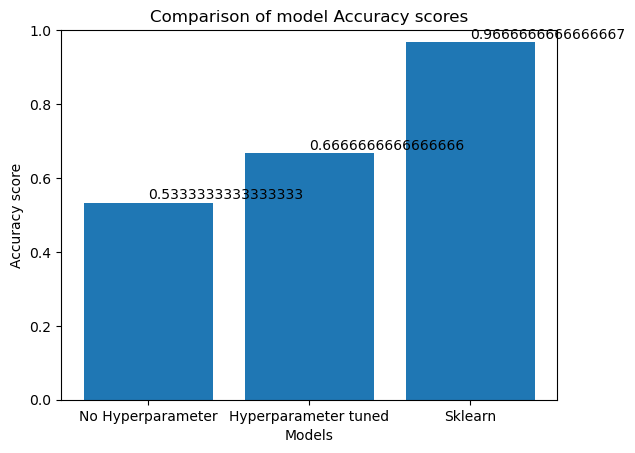

In [88]:
import matplotlib.pyplot as plt

# Define the values for the bars
no_hyperparam = without_sklearn_accuracy
hyperparam_tuned = best_accuracy
sklearn = with_sklearn_accuracy

# Create the bar plot
plt.bar(["No Hyperparameter", "Hyperparameter tuned", "Sklearn"], [no_hyperparam, hyperparam_tuned, sklearn])

# Add annotations to the bars
plt.text(0, no_hyperparam + 0.01, str(no_hyperparam))
plt.text(1, hyperparam_tuned + 0.01, str(hyperparam_tuned))
plt.text(2, sklearn + 0.01, str(sklearn))

# Set the y-axis limits
plt.ylim(0, 1.0)

# Add labels to the plot
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.title("Comparison of model Accuracy scores")

# Display the plot
plt.show()


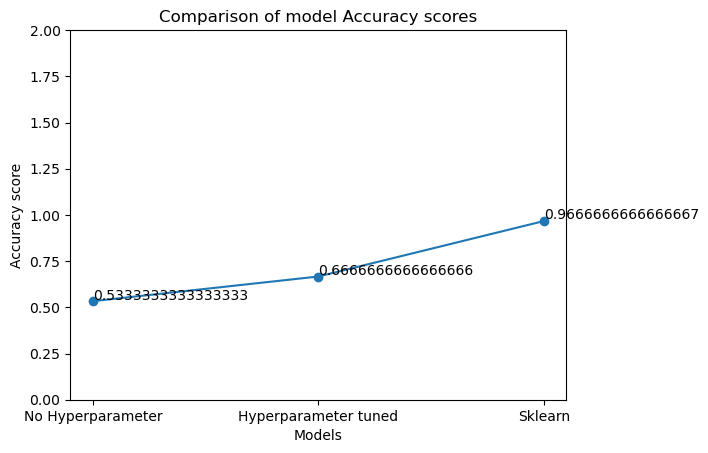

In [86]:
import matplotlib.pyplot as plt

# Define the values for the bars
no_hyperparam = without_sklearn_accuracy
hyperparam_tuned = best_accuracy
sklearn = with_sklearn_accuracy

# Create the bar plot
plt.plot(["No Hyperparameter", "Hyperparameter tuned", "Sklearn"], [no_hyperparam, hyperparam_tuned, sklearn], marker='o')

# Add annotations to the bars
plt.text(0, no_hyperparam + 0.01, str(no_hyperparam))
plt.text(1, hyperparam_tuned + 0.01, str(hyperparam_tuned))
plt.text(2, sklearn + 0.01, str(sklearn))

# Set the y-axis limits
plt.ylim(0, 2.0)

# Add labels to the plot
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.title("Comparison of model Accuracy scores")

# Display the plot
plt.show()
